Comparing the experimental holograms to Mie theory via holopy to the Rayliegh Gans approximation defined in this module.

In [1]:
%matplotlib inline

In [2]:
import holopy as hp
from holopy.core.process import bg_correct
from holopy.scattering import calc_holo, Sphere

from holoinfer.model import hologram
import holoinfer.model.math as m

import matplotlib.pyplot as plt

import numpy as np

Experimental data:

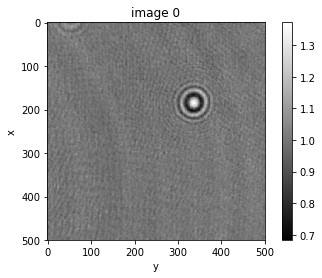

In [3]:
rholo = hp.core.load_image('exp_data_1/r_particle_0.png', channel=0, 
                          medium_index=1.33, spacing=0.0858, illum_polarization=(1,0), illum_wavelen=.660)

bgimg = ['exp_data_1/r_particle_bg_0.png', 'exp_data_1/r_particle_bg_1.png', 'exp_data_1/r_particle_bg_2.png']
bg = hp.core.io.load_average(bgimg, refimg = rholo, channel=0)
holo = bg_correct(rholo, bg)
                          
hp.show(holo)

Mie theory from holopy

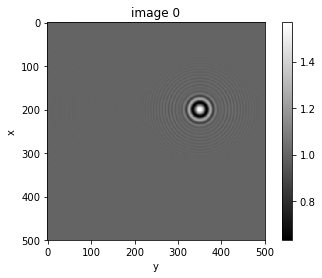

In [4]:
res = 0.0858
sphere = Sphere(n = 1.4734, r = .5, center = (200*res, 350*res, 5))
detector = hp.detector_grid(shape = 500, spacing = res)
holo2 = calc_holo(detector, sphere, medium_index=1.33, illum_wavelen=.660, illum_polarization=(1,0))
hp.show(holo2)

Rayleigh-Gans model

C:\Users\pancake\GitHub\holoinfer\holoinfer\model\hologram.py:19: RuntimeWarning: divide by zero encountered in double_scalars
  s2_phase = np.arctan((re_m - 1) / im_m)


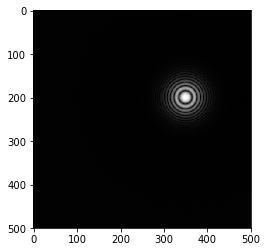

In [5]:
pixel_size = 0.0858
grid_size = 500
x = y = np.linspace(0, pixel_size*grid_size, grid_size)
z = 0

grid = m.cartesian(x, y, z)

illum_wavelength = .660
illum_wavenumber = 2*np.pi/illum_wavelength
sc_center = np.array([350*pixel_size, 200*pixel_size, 5])
sc_index = np.array([1.4734/1.33, 0])
sc_radius = .5

data = hologram.rayleigh_gans_sphere_holo(grid, illum_wavenumber, sc_center, sc_index, sc_radius)
#data = m.add_noise(data, sc=.1)
plt.gray()
plt.imshow(data.reshape((grid_size,grid_size)))
plt.show()

Other experimental data

In [ ]:
rholo = hp.core.load_image('exp_data_1/r_particle_1.png', channel=0, 
                          medium_index=1.33, spacing=0.0858, illum_polarization=(1,0), illum_wavelen=.660)

bgimg = ['exp_data_1/r_particle_bg_0.png', 'exp_data_1/r_particle_bg_1.png', 'exp_data_1/r_particle_bg_2.png']
bg = hp.core.io.load_average(bgimg, refimg = rholo, channel=0)
holo = bg_correct(rholo, bg)
hp.show(holo)

In [ ]:
rholo = hp.core.load_image('exp_data_1/r_dimer_0.png', channel=0, 
                          medium_index=1.33, spacing=0.0858, illum_polarization=(1,0), illum_wavelen=.660)

bgimg = ['exp_data_1/r_dimer_bg_0.png', 'exp_data_1/r_dimer_bg_1.png',
         'exp_data_1/r_dimer_bg_2.png', 'exp_data_1/r_dimer_bg_3.png']
bg = hp.core.io.load_average(bgimg, refimg = rholo, channel=0)
holo = bg_correct(rholo, bg)
hp.show(holo)

In [ ]:
rholo = hp.core.load_image('exp_data_1/r_dimer_1.png', channel=0, 
                          medium_index=1.33, spacing=0.0858, illum_polarization=(1,0), illum_wavelen=.660)

bgimg = ['exp_data_1/r_dimer_bg_0.png', 'exp_data_1/r_dimer_bg_1.png',
         'exp_data_1/r_dimer_bg_2.png', 'exp_data_1/r_dimer_bg_3.png']
bg = hp.core.io.load_average(bgimg, refimg = rholo, channel=0)
holo = bg_correct(rholo, bg)
hp.show(holo)